In [1]:
import matplotlib, sys,  os
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'
os.environ['NUMEXPR_NUM_THREADS'] = '1'
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
sys.path.append("./mylib/")

import numpy as np
matplotlib.use('Agg')
import matplotlib.pyplot as plt

np.seterr(all="ignore")
from threeML import *
from WCDA_hal import HAL, HealpixConeROI, HealpixMapROI
import traceback
silence_warnings()
import warnings
warnings.simplefilter("ignore")
silence_warnings()
from threeML import silence_progress_bars, activate_progress_bars, toggle_progress_bars
from threeML.utils.progress_bar import trange

from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy import units as u
# from astropy.visualization import astropy_mpl_style, imshAow_norm
from astropy.coordinates import Angle

import healpy as hp

from tqdm import tqdm

# from mylib import *
import mylib as my
from importlib import reload
import copy
import pandas as pd

Welcome to JupyROOT 6.24/06


15:48:02 WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=772936;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=812329;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#71\71]8;;\
                  will not be available.                                                                           

15:48:03 INFO      Starting 3ML!                                                                     ]8;id=332894;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=446043;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#35\35]8;;\

         WARNING   WARNINGs here are NOT errors                                                      ]8;id=522816;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=558074;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#36\36]8;;\

         WARNING   but are inform you about optional packages that can be installed                  ]8;id=863874;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=227419;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#37\37]8;;\

         WARNING    to disable these messages, turn off start_warning in your config file            ]8;id=648133;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=394277;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#40\40]8;;\

15:48:05 WARNING   The cthreeML package is not installed. You will not be able to use plugins which  ]8;id=539549;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=283003;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#94\94]8;;\
                  require the C/C++ interface (currently HAWC)                                                     

         WARNING   Could not import plugin FermiLATLike.py. Do you have the relative instrument     ]8;id=258934;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=296271;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

         WARNING   Could not import plugin HAWCLike.py. Do you have the relative instrument         ]8;id=657096;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=573471;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

15:48:05 WARNING   No fermitools installed                                              ]8;id=437834;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=324138;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py#44\44]8;;\


WARNING NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "process_dec_bins" failed type inference due to: Use of unsupported NumPy function 'numpy.einsum' or unsupported use of the function.

File "../../../../.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py", line 39:
def process_dec_bins(sflux, w1, w2, ss1, ss2):
    ss1_sum = np.einsum('ij,j->i', sflux, ss1) * w1
    ^

During: typing of get attribute at /data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py (39)

File "../../../../.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py", line 39:
def process_dec_bins(sflux, w1, w2, ss1, ss2):
    ss1_sum = np.einsum('ij,j->i', sflux, ss1) * w1
    ^



WARNING NumbaWarning: Function "process_dec_bins" was compiled in object mode without forceobj=Tru

Yourlib init successfully!!!


18:47:12 INFO      Region of Interest:                                                                   ]8;id=529675;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=331288;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#292\292]8;;\

         INFO      -------------------                                                                   ]8;id=509205;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=154924;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#293\293]8;;\

         INFO      HealpixConeROI: Center (R.A., Dec) = (83.000, 26.000), data radius =      ]8;id=526438;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_cone_roi.py\healpix_cone_roi.py]8;;\:]8;id=678809;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_cone_roi.py#87\87]8;;\
                  7.000 deg, model radius: 8.000 deg                                                               

         INFO                                                                                            ]8;id=806880;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=774887;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#296\296]8;;\

         INFO      Flat sky projection:                                                                  ]8;id=719877;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=242463;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#297\297]8;;\

         INFO      --------------------                                                                  ]8;id=295175;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=614752;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#298\298]8;;\

         INFO      Width x height 96 x 96 px                                                             ]8;id=185312;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=647767;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#300\300]8;;\

         INFO      Pixel sizes: 0.17 deg                                                                 ]8;id=220697;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=432302;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#305\305]8;;\

         INFO                                                                                            ]8;id=872362;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=906455;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#308\308]8;;\

         INFO      Response:                                                                             ]8;id=205952;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=618190;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#309\309]8;;\

         INFO      ---------                                                                             ]8;id=635572;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=485751;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#310\310]8;;\

         INFO      Response file:                                                                   ]8;id=645302;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=270318;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#340\340]8;;\
                  /data/home/cwy/Science/3MLWCDA/Standard/src/../../data/KM2A_DR_xsq.root                          

         INFO      Number of dec bins: 110                                                          ]8;id=29230;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=789803;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#341\341]8;;\

         INFO      Number of energy/nHit planes per dec bin_name: 14                                ]8;id=115123;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=984081;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#344\344]8;;\

         INFO                                                                                            ]8;id=513464;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=951612;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#314\314]8;;\

         INFO      Map Tree:                                                                             ]8;id=262602;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=693233;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#315\315]8;;\

         INFO      ----------                                                                            ]8;id=187971;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=21947;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#316\316]8;;\

Bin  Nside Scheme    Obs counts    Bkg counts   obs/bkg  Pixels in ROI  \
0    0   1024   RING  5.666616e+06  5.647165e+06  1.003444          46890   
1    1   1024   RING  1.106946e+07  1.101380e+07  1.005054          46890   
2    2   1024   RING  5.784835e+06  5.741550e+06  1.007539          46890   
3    3   1024   RING  1.585308e+06  1.559437e+06  1.016590          46890   
4    4   1024   RING  1.410881e+05  1.316069e+05  1.072042          46890   
5    5   1024   RING  2.470659e+04  2.098018e+04  1.177616          46890   
6    6   1024   RING  1.315569e+04  1.108550e+04  1.186747          46890   
7    7   1024   RING  3.045440e+03  2.296927e+03  1.325876          46890   
8    8   1024   RING  9.292700e+02  6.642609e+02  1.398953          46890   
9    9   1024   RING  2.826400e+02  2.424763e+02  1.165640          46890   
10  10   1024   RING  1.156700e+02  7.578541e+01  1.526283          46890   
11  11   1024   RING  4.458000e+01  2.668070e+01  1.670871          46890   
12  12   1024   RING  1.400000e+01  8.642391e+00  1.619922          46890   
13  13   1024   RING  2.000000e+00  3.519991e+00  0.568183          46890   

    Area (deg^2)  
0     153.728434  
1     153.728434  
2     153.728434  
3     153.728434  
4     153.728434  
5     153.728434  
6     153.728434  
7     153.728434  
8     153.728434  
9     153.728434  
10    153.728434  
11    153.728434  
12    153.728434  
13    153.728434

         INFO      This Map Tree contains 1570.300 transits in the first bin                        ]8;id=421440;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=500350;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#149\149]8;;\

         INFO      Total data size: 10.50 Mb                                                        ]8;id=519853;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=74746;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#151\151]8;;\

         INFO                                                                                            ]8;id=787894;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=344313;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#320\320]8;;\

         INFO      Active energy/nHit planes (14):                                                       ]8;id=134723;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=935508;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#322\322]8;;\

         INFO      -------------------------------                                                       ]8;id=654219;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=350044;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#323\323]8;;\

         INFO      ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']            ]8;id=217628;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=324275;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#324\324]8;;\

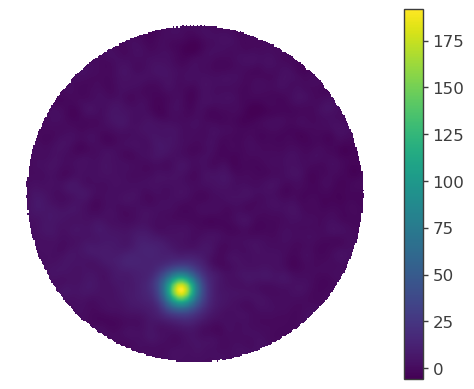

In [27]:
#####   Data Initialize

# maptree = "../../data/KM2A_all_final.root" #old catalog
# response = "../../data/KM2A_DR_all.root"

# maptree = "../../data/KM2A1234full_skymap_rcy.root"
# # maptree = "/data/home/cwy/Science/KM2A1234full_skymap_rcy_test.root"
# response = "../../data/KM2A1234full_mcpsf_DRfinal.root"

maptree = "../../data/KM2A_20240731_xsq_out.root"
response = "../../data/KM2A_DR_xsq.root"

region_name="S147"
if not os.path.exists(f'../res/{region_name}/'):
    os.system(f'mkdir ../res/{region_name}/')
# ra_S147, dec_S147 =  84.60, 28.29
ra_S147, dec_S147 =   83, 26 #84.60, 28.29
ra1,dec1=ra_S147, dec_S147

data_radius = 7.0
model_radius = 8.0

# roimap = my.getmaskedroi(ra1, dec1, data_radius, [(85.78, 23.40, 3), (83.63, 22.02, 3)]) #
# roi = HealpixMapROI(ra=ra1,dec=dec1, data_radius=data_radius, model_radius=model_radius, roimap=roimap) 

roi=HealpixConeROI(ra=ra1,dec=dec1,data_radius=data_radius,model_radius=model_radius) 

KM2A = HAL("KM2A", maptree, response, roi, flat_sky_pixels_size=0.17)

#####   Data Situation
%matplotlib inline
KM2A.set_active_measurements(0, 13)
KM2A.display()

fig = KM2A.display_stacked_image(smoothing_kernel_sigma=0.25)
fig.show()
fig.savefig(f"../res/{region_name}/counts_all.png",dpi=300)

In [ ]:
reload(my)

Load sub from Mystat: : 40it [2:58:37, 267.95s/it]
Load sub from Mystat: : 40it [00:00, 174.58it/s]                            

Yourlib init successfully!!!


<module 'mylib' from '/data/home/cwy/Science/3MLWCDA/Standard/src/mylib/__init__.py'>

Load sub from Mystat: : 40it [00:12, 174.58it/s]

22:13:23 INFO      J0534P3533 in model_radius: 8.0                                                     ]8;id=501909;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=853432;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#292\292]8;;\

         INFO      Spec:                                                                               ]8;id=259769;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=411260;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#328\328]8;;\
                   K=1.90e-17 kb=(1.00e-17, 2.80e-17) index=-4.89 indexb=(-5.00,-3.30)                             

         INFO      Mor: fitrange=0.54                                                                  ]8;id=816081;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=721326;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#338\338]8;;\

         INFO      J0534P2200u in model_radius: 8.0                                                    ]8;id=90353;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=241214;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#292\292]8;;\

         INFO      Spec:                                                                               ]8;id=621613;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=218630;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#328\328]8;;\
                   K=6.23e-16 kb=(5.93e-16, 6.53e-16) index=-3.19 indexb=(-3.28,-3.10)                             

         INFO      Mor: fitrange=0.03                                                                  ]8;id=759905;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=318315;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#338\338]8;;\

         INFO      J0542P2311u in data_radius: 6.0                                                     ]8;id=227046;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=537556;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#285\285]8;;\

         INFO      Spec:                                                                               ]8;id=282841;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=964570;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#328\328]8;;\
                   K=2.93e-16 kb=(2.57e-16, 3.29e-16) index=-3.74 indexb=(-4.01,-3.47)                             

         INFO      Mor:                                                                                ]8;id=674777;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=924547;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#330\330]8;;\
                   sigma=0.98 sb=(0.88,1.08) fitrange=0.42                                                         

22:13:24 INFO      Set diffuse range: [171.0, 187.0] [-8.0, 8.0]                                      ]8;id=261241;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=528049;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1033\1033]8;;\

         INFO      ra dec coner:                                                                      ]8;id=429257;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=681530;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1034\1034]8;;\

         INFO      (72.84353788918419, 31.700794361752866)                                            ]8;id=289256;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=206207;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1035\1035]8;;\

         INFO      (83.01946182026985, 18.780658721969615)                                            ]8;id=880760;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=45458;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1036\1036]8;;\

         INFO      (98.13503182153404, 26.671045840258685)                                            ]8;id=826707;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=430850;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1037\1037]8;;\

         INFO      (89.28477347062322, 40.72316054822685)                                             ]8;id=386555;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=352016;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1038\1038]8;;\

         INFO      total sr: 0.07772890321151499                                                      ]8;id=111038;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=45921;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1077\1077]8;;\
                  ratio: 0.028307125215400412                                                                      

         INFO      integration: 4.530610589546855e-06                                                 ]8;id=471700;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=50425;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1078\1078]8;;\
                  ratio: 0.03575357240331687                                                                       

         INFO      set K to: 6.410467081648078e-13                                                    ]8;id=250661;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=241790;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1079\1079]8;;\

         INFO      diffuse file path: ../../data/S147_dust_bkg_template.fits                          ]8;id=255762;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=706255;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1106\1106]8;;\

Load sub from Myspeedup: 100%|██████████| 37/37 [00:20<00:00, 38.31it/s]

The kernel is too large with respect to the model image. Enlarge your model radius.
Failed to generate proper kernel normalization: got _kernel.sum() = 0.000000; expected 1.0+-0.01.


22:13:26 INFO      Considering 7 dec bins for extended source J0542P2311u           ]8;id=31430;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=962562;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 23.200                      ]8;id=509910;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=215681;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 19 dec bins for extended source Diffuse              ]8;id=92395;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=769230;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 29.718                      ]8;id=426879;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=182036;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

22:14:19 INFO      Maxres ra,dec: [84.55078125],[27.995423877088484]                                   ]8;id=433783;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=454335;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#876\876]8;;\

<Figure size 640x480 with 0 Axes>

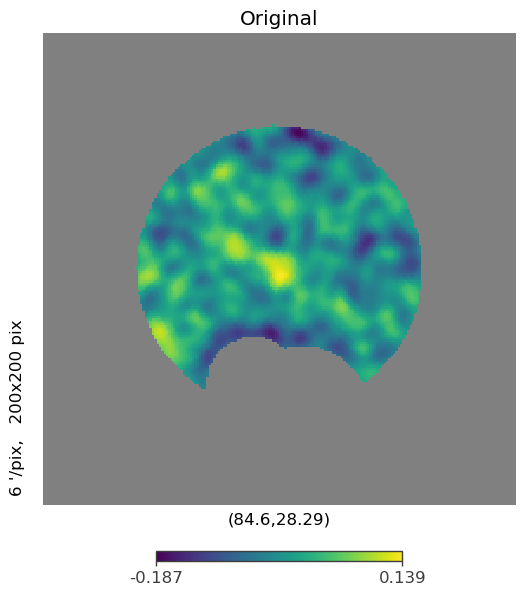

The kernel is too large with respect to the model image. Enlarge your model radius.
Failed to generate proper kernel normalization: got _kernel.sum() = 0.000000; expected 1.0+-0.01.


22:14:21 INFO      Considering 7 dec bins for extended source J0542P2311u           ]8;id=280596;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=909676;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 23.200                      ]8;id=305756;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=680056;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 19 dec bins for extended source Diffuse              ]8;id=291057;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=206717;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 29.718                      ]8;id=268393;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=435266;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

The kernel is too large with respect to the model image. Enlarge your model radius.
Failed to generate proper kernel normalization: got _kernel.sum() = 0.000000; expected 1.0+-0.01.


22:14:22 INFO      Considering 7 dec bins for extended source J0542P2311u           ]8;id=364307;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=717855;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 23.200                      ]8;id=682281;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=893208;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 19 dec bins for extended source Diffuse              ]8;id=212316;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=890854;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 29.718                      ]8;id=532476;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=939193;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=921679;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=559739;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=497714;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=129296;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

result   
parameter                                                                  
J0542P2311u.Gaussian_on_sphere.lon0       (8.6130000 +/- 0.0000010) x 10  \
J0542P2311u.Gaussian_on_sphere.lat0       (2.3620000 +/- 0.0000026) x 10   
J0542P2311u.Gaussian_on_sphere.sigma                 1.08000 +/- 0.00023   
J0542P2311u.spectrum.main.Powerlaw.K      (3.29000 +/- 0.00015) x 10^-25   
J0542P2311u.spectrum.main.Powerlaw.index              -3.4700 +/- 0.0007   
Diffuse.spectrum.main.Powerlaw.K                (2.1 -1.3 +3.1) x 10^-21   
Diffuse.spectrum.main.Powerlaw.index                      -3.20 +/- 0.30   
pt3.position.ra                                   (8.456 +/- 0.006) x 10   
pt3.position.dec                                  (2.843 +/- 0.005) x 10   
pt3.spectrum.main.Powerlaw.K                    (0.9 -0.6 +1.4) x 10^-22   
pt3.spectrum.main.Powerlaw.index                          -3.22 +/- 0.31   

                                                     unit  
parameter                                                  
J0542P2311u.Gaussian_on_sphere.lon0                   deg  
J0542P2311u.Gaussian_on_sphere.lat0                   deg  
J0542P2311u.Gaussian_on_sphere.sigma                  deg  
J0542P2311u.spectrum.main.Powerlaw.K      1 / (keV s cm2)  
J0542P2311u.spectrum.main.Powerlaw.index                   
Diffuse.spectrum.main.Powerlaw.K          1 / (keV s cm2)  
Diffuse.spectrum.main.Powerlaw.index                       
pt3.position.ra                                       deg  
pt3.position.dec                                      deg  
pt3.spectrum.main.Powerlaw.K              1 / (keV s cm2)  
pt3.spectrum.main.Powerlaw.index

Correlation matrix:

1.00 -0.00  0.00 -0.00 -0.00  0.00 -0.00  0.00  0.00 -0.00  0.00
-0.00  1.00  0.00 -0.00  0.00  0.00 -0.00  0.00  0.00 -0.00  0.00
 0.00  0.00  1.00  0.00 -0.00 -0.00  0.00 -0.00 -0.00  0.00 -0.00
-0.00 -0.00  0.00  1.00  0.00  0.00 -0.00  0.00  0.00 -0.00  0.00
-0.00  0.00 -0.00  0.00  1.00 -0.00  0.00 -0.00 -0.00  0.00 -0.00
 0.00  0.00 -0.00  0.00 -0.00  1.00 -0.98  0.01  0.01 -0.09  0.08
-0.00 -0.00  0.00 -0.00  0.00 -0.98  1.00 -0.01 -0.01  0.08 -0.08
 0.00  0.00 -0.00  0.00 -0.00  0.01 -0.01  1.00  0.02 -0.14  0.13
 0.00  0.00 -0.00  0.00 -0.00  0.01 -0.01  0.02  1.00 -0.16  0.15
-0.00 -0.00  0.00 -0.00  0.00 -0.09  0.08 -0.14 -0.16  1.00 -0.97
 0.00  0.00 -0.00  0.00 -0.00  0.08 -0.08  0.13  0.15 -0.97  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
KM2A        5749.394153
total       5749.394153

Values of statistical measures:

statistical measures
AIC          11520.788937
BIC          11641.183735

Smoothing planes:   0%|          | 0/10 [00:00<?, ?it/s]

The kernel is too large with respect to the model image. Enlarge your model radius.
Failed to generate proper kernel normalization: got _kernel.sum() = 0.000000; expected 1.0+-0.01.


22:24:05 INFO      Considering 8 dec bins for extended source J0542P2311u           ]8;id=670590;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=939446;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 23.620                      ]8;id=546772;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=514770;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 19 dec bins for extended source Diffuse              ]8;id=79157;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=834179;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 29.718                      ]8;id=68474;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=956962;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=977;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=598905;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=59315;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=867943;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

The kernel is too large with respect to the model image. Enlarge your model radius.
Failed to generate proper kernel normalization: got _kernel.sum() = 0.000000; expected 1.0+-0.01.


22:24:30 INFO      Considering 8 dec bins for extended source J0542P2311u           ]8;id=361167;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=962078;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 23.620                      ]8;id=281712;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=122688;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 19 dec bins for extended source Diffuse              ]8;id=981490;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=68151;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 29.718                      ]8;id=409763;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=224335;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\


100%|██████████| 1/1 [00:27<00:00, 27.16s/it]


TeVCat:  1 85.77999999999999 23.4 HAWC J0543+233 0.5
PSR:  1 84.60441666666665 28.28588888888889 J0538+2817
PSR:  2 85.15466666666666 32.127027777777776 J0540+3207
PSR:  3 85.79025 23.484722222222224 J0543+2329
PSR:  4 86.61983333333332 24.689166666666665 J0546+2441
PSR:  5 88.52087499999999 31.128055555555555 J0554+3107
SNR:  1 81.27083333333333 28.183333333333334 G178.2-04.2
SNR:  2 84.75 27.833333333333332 G180.0-01.7
SNR:  3 88.41666666666664 31.083333333333332 G179.0+02.6
3FHL:  1 81.13713 28.639719 3FHL J0524.5+2838
3FHL:  2 84.41 27.86 3FHL J0537.6+2751e
3FHL:  3 87.29354 32.967197 3FHL J0549.1+3258
3FHL:  4 89.91721 30.76214 3FHL J0559.6+3045
4FGL:  1 78.0817 33.4844 4FGL J0512.3+3329
4FGL:  2 79.1759 27.7194 4FGL J0516.7+2743
4FGL:  3 79.9026 27.7405 4FGL J0519.6+2744
4FGL:  4 81.128 28.6572 4FGL J0524.5+2839
4FGL:  5 81.5908 22.7778 4FGL J0526.3+2246
4FGL:  6 82.6095 33.0533 4FGL J0530.4+3303
4FGL:  7 83.1709 33.9832 4FGL J0532.6+3358
4FGL:  8 83.3062 30.4157 4FGL J0533.2+302

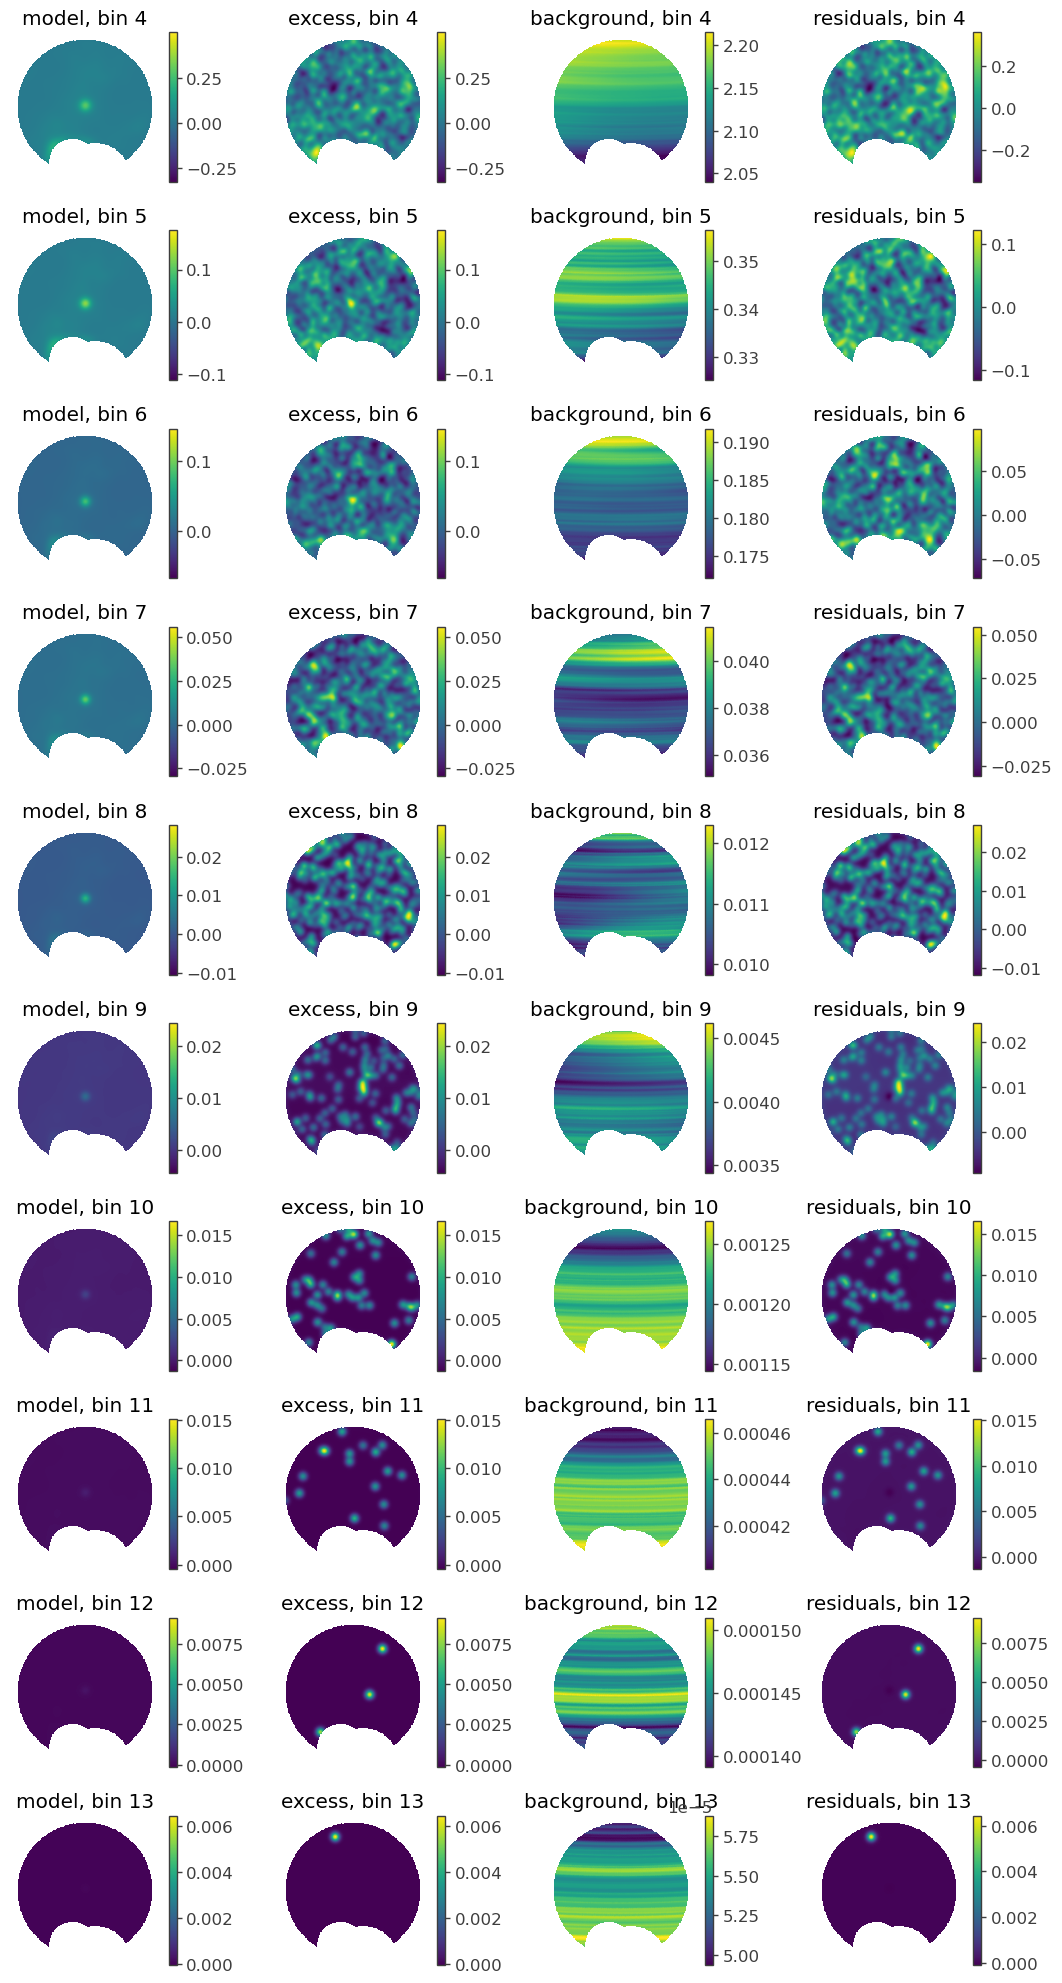

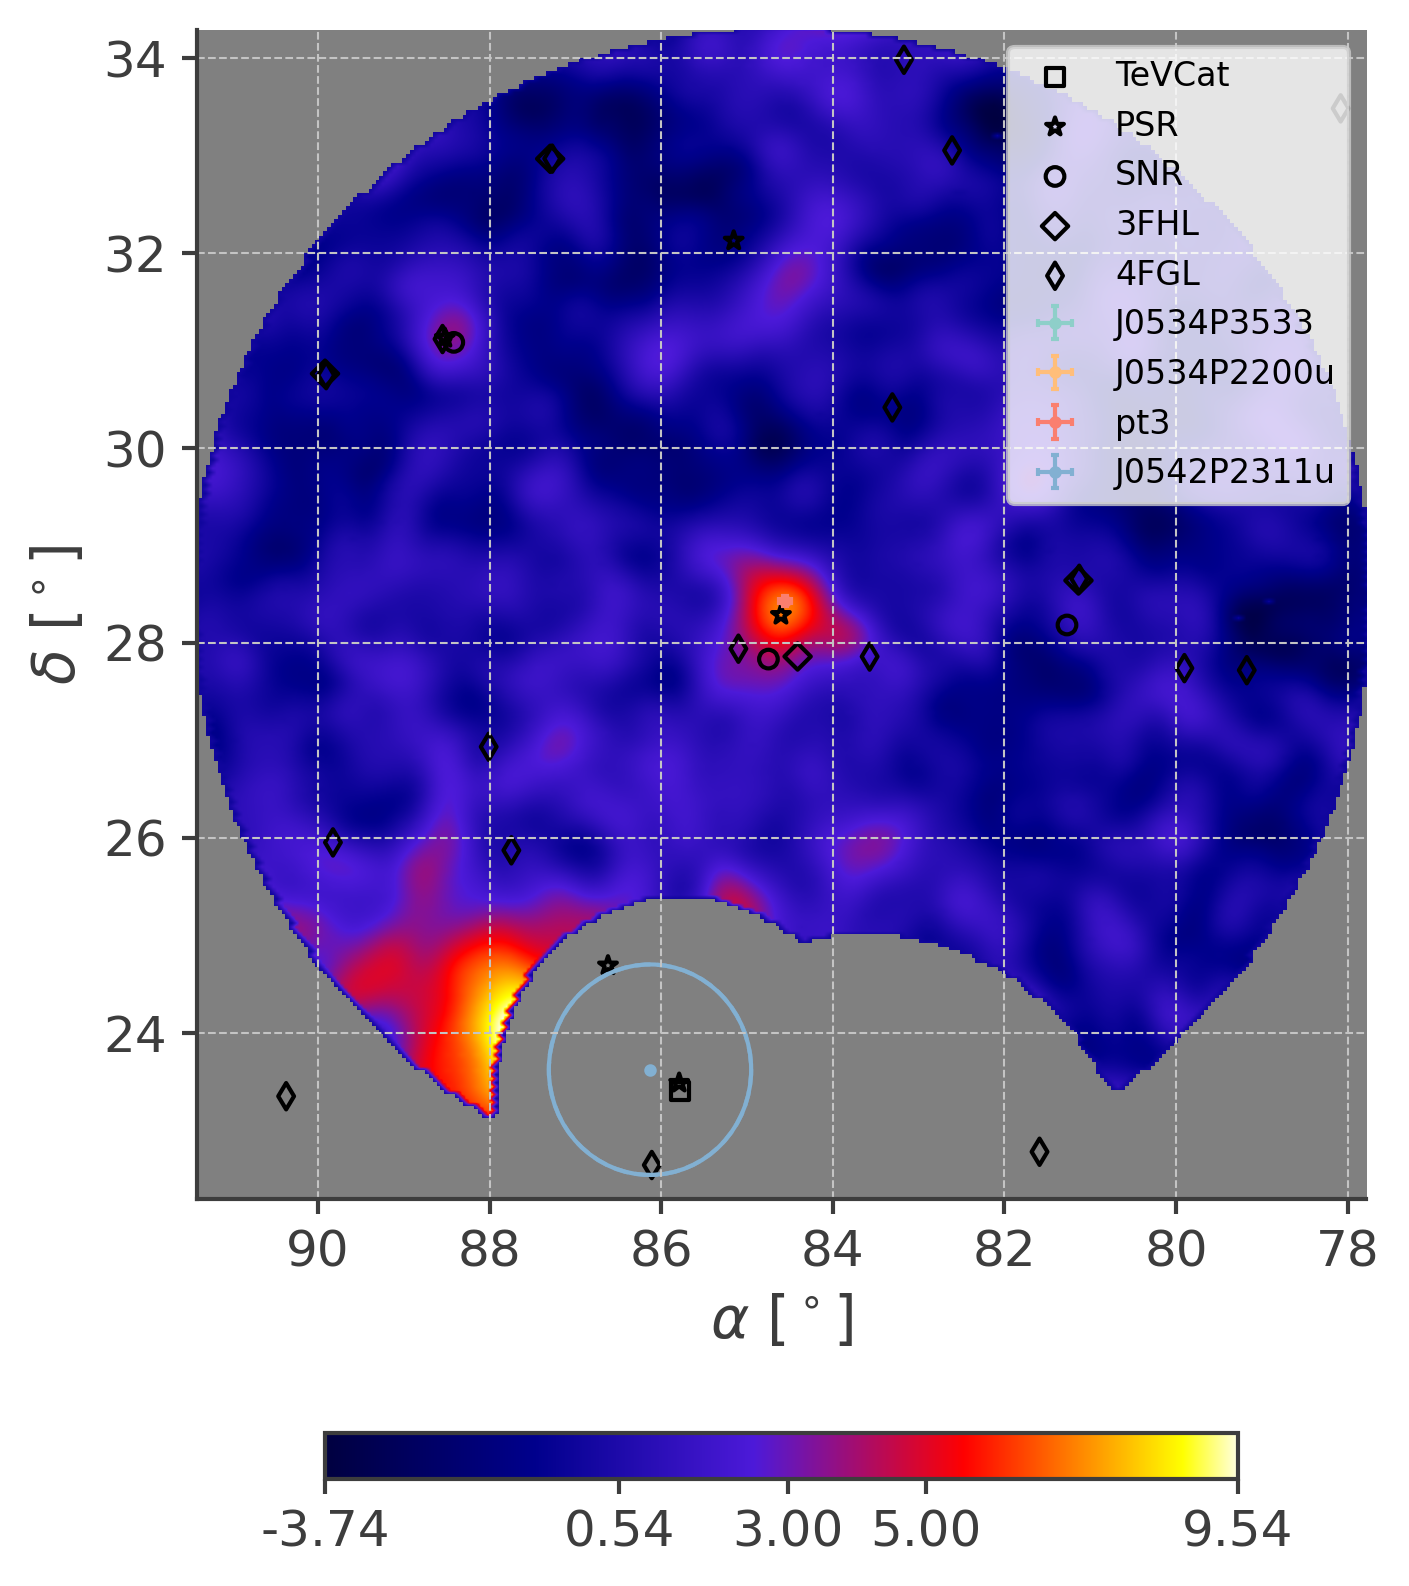

The kernel is too large with respect to the model image. Enlarge your model radius.
Failed to generate proper kernel normalization: got _kernel.sum() = 0.000000; expected 1.0+-0.01.


22:25:54 INFO      Considering 8 dec bins for extended source J0542P2311u           ]8;id=168093;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=577404;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 23.620                      ]8;id=297161;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=381412;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 19 dec bins for extended source Diffuse              ]8;id=388870;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=777595;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 29.718                      ]8;id=650879;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=693891;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 19 dec bins for extended source ext2                 ]8;id=662098;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=310622;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 27.995                      ]8;id=631813;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=841102;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

The kernel is too large with respect to the model image. Enlarge your model radius.
Failed to generate proper kernel normalization: got _kernel.sum() = 0.000000; expected 1.0+-0.01.


22:25:56 INFO      Considering 8 dec bins for extended source J0542P2311u           ]8;id=460259;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=643509;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 23.620                      ]8;id=564997;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=330870;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 19 dec bins for extended source Diffuse              ]8;id=771580;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=393093;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 29.718                      ]8;id=511265;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=794934;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 19 dec bins for extended source ext2                 ]8;id=180961;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=574382;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 27.995                      ]8;id=106692;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=752940;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=876138;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=121026;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=358891;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=156291;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

KeyboardInterrupt: bool ROOT::Minuit2::Minuit2Minimizer::Minimize() =>
    KeyboardInterrupt: 

In [3]:
my.Search(ra1, dec1, data_radius, model_radius, region_name, KM2A, roi, 4,13, fromcatalog=1, detector="KM2A", fixcatall=0)

In [31]:
Modelname="1pt_freeDGE_4-13_KM2A"
if not os.path.exists(f'../res/{region_name}/{Modelname}/'):
    os.system(f'mkdir ../res/{region_name}/{Modelname}/')

lm = my.getcatModel(ra1, dec1, data_radius, model_radius, detector="KM2A", rtsigma = 8, rtflux = 15, rtindex = 2, rtp = 8)

# S147 = my.set_diffusemodel("S147", '/data/home/cwy/Science/3MLWCDA/Standard/res/S147/S147_HI_temp.fits', K=7.3776826e-14, Kb=(1e-17, 1e-12))

PWN = my.setsorce("PWN",84.5,28.2, k=1e-14, index=-3.6, #sigma=0.2, sb=(0,5), #sf=True, #raf=True,decf=True,
                indexb=(-4,-1),kb=(1e-19, 1e-14), #indexf=True,
                fitrange=0.5, piv=50)

Diffuse = my.set_diffusebkg( 
                ra1, dec1, data_radius, data_radius, K=1e-15, Kb=(1e-19, 1e-13), index=-3.2,
                Kf=False, indexf=False, piv=50
                )
# lm = Model(PWN, Diffuse) #S147,
# lm = Model(S147, PWN, Diffuse)
# lm.add_source(S147)
lm.add_source(PWN); lm.add_source(Diffuse)

lm.save(f"../res/{region_name}/{Modelname}/Model_init.yml", overwrite=True)
with open(f'../res/{region_name}/{Modelname}/Model_init.txt', 'w') as f:
    for key, value in lm.parameters.items():
        f.write(f'{key}: {value}\n')

lm.display(complete=True)

19:34:07 INFO      J0534P2200u in data_radius: 7.0 sf:False pf:False kf:False indexf:False             ]8;id=134861;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=268138;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#359\359]8;;\

         INFO      Spec:                                                                               ]8;id=223705;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=303665;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#414\414]8;;\
                   K=6.23e-16 kb=(4.15e-18, 9.35e-15) index=-3.19 indexb=(-5.19,-1.50)                             

         INFO      Mor: fitrange=0.09                                                                  ]8;id=105277;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=208847;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#424\424]8;;\

         INFO      J0542P2311u in data_radius: 7.0 sf:False pf:False kf:False indexf:False             ]8;id=751564;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=318105;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#359\359]8;;\

         INFO      Spec:                                                                               ]8;id=510729;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=35041;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#414\414]8;;\
                   K=2.93e-16 kb=(1.95e-18, 4.39e-15) index=-3.74 indexb=(-5.50,-1.74)                             

         INFO      Mor:                                                                                ]8;id=919267;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=240872;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#416\416]8;;\
                   sigma=0.98 sb=(0.58,1.38) fitrange=1.12                                                         

         INFO      Set diffuse range: [173.8761882515279, 187.8761882515279] [-11.120416922412602,    ]8;id=212859;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=452516;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1486\1486]8;;\
                  11.120416922412602]                                                                              

         INFO      ra dec coner:                                                                      ]8;id=167308;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=185321;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1487\1487]8;;\

         INFO      (72.095650750833, 27.534654967370322)                                              ]8;id=729921;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=302942;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1488\1488]8;;\

         INFO      (80.7485770724112, 16.372828783120497)                                             ]8;id=921972;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=870669;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1489\1489]8;;\

         INFO      (101.71036418428284, 27.243894357199302)                                           ]8;id=755947;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=418054;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1490\1490]8;;\

         INFO      (94.62577936465718, 39.656070093060315)                                            ]8;id=360955;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=305174;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1491\1491]8;;\

         INFO      total sr: 0.09450243804428704                                                      ]8;id=543727;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=136413;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1530\1530]8;;\
                  ratio: 0.03441567082968896                                                                       

         INFO      integration: 4.719472258839413e-06                                                 ]8;id=601828;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=744647;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1531\1531]8;;\
                  ratio: 0.03724398506046341                                                                       

         INFO      set K to: 1e-15                                                                    ]8;id=751295;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=931959;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1532\1532]8;;\

         INFO      diffuse file path: ../../data/Cache_dust_bkg_template.fits                         ]8;id=105106;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=258536;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1559\1559]8;;\

Model summary:
==============

                  N
Point sources     2
Extended sources  2
Particle sources  0

Free parameters (15):
--------------------

                                          value min_value max_value  \
J0534P2200u.position.ra                   83.61    83.522    83.698   
J0534P2200u.position.dec                  22.04    21.952    22.128   
J0534P2200u.spectrum.main.Powerlaw.K        0.0       0.0       0.0   
J0534P2200u.spectrum.main.Powerlaw.index  -3.19     -5.19      -1.5   
J0542P2311u.Gaussian_on_sphere.lon0       85.71     84.59     86.83   
J0542P2311u.Gaussian_on_sphere.lat0        23.2     22.08     24.32   
J0542P2311u.Gaussian_on_sphere.sigma       0.98      0.58      1.38   
J0542P2311u.spectrum.main.Powerlaw.K        0.0       0.0       0.0   
J0542P2311u.spectrum.main.Powerlaw.index  -3.74      -5.5     -1.74   
PWN.position.ra                            84.5      84.0      85.0   
PWN.position.dec                           28.2      27.7      28.7   
PWN.spectrum.main.Powerlaw.K                0.0       0.0       0.0   
PWN.spectrum.main.Powerlaw.index           -3.6      -4.0      -1.0   
Diffuse.spectrum.main.Powerlaw.K            0.0       0.0       0.0   
Diffuse.spectrum.main.Powerlaw.index       -3.2      -4.0      -1.0   

                                                    unit  
J0534P2200u.position.ra                              deg  
J0534P2200u.position.dec                             deg  
J0534P2200u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J0534P2200u.spectrum.main.Powerlaw.index                  
J0542P2311u.Gaussian_on_sphere.lon0                  deg  
J0542P2311u.Gaussian_on_sphere.lat0                  deg  
J0542P2311u.Gaussian_on_sphere.sigma                 deg  
J0542P2311u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J0542P2311u.spectrum.main.Powerlaw.index                  
PWN.position.ra                                      deg  
PWN.position.dec                                     deg  
PWN.spectrum.main.Powerlaw.K              keV-1 s-1 cm-2  
PWN.spectrum.main.Powerlaw.index                          
Diffuse.spectrum.main.Powerlaw.K          keV-1 s-1 cm-2  
Diffuse.spectrum.main.Powerlaw.index                      

Fixed parameters (7):
---------------------

                                                                                    value  \
J0534P2200u.spectrum.main.Powerlaw.piv                                      50000000000.0   
J0542P2311u.spectrum.main.Powerlaw.piv                                      50000000000.0   
PWN.spectrum.main.Powerlaw.piv                                              50000000000.0   
Diffuse.SpatialTemplate_2D.K                                                          1.0   
Diffuse.SpatialTemplate_2D.hash         2004380090830995775312600999912794192983631923...   
Diffuse.SpatialTemplate_2D.ihdu                                                       0.0   
Diffuse.spectrum.main.Powerlaw.piv                                          50000000000.0   

                                       min_value max_value   unit  
J0534P2200u.spectrum.main.Powerlaw.piv      None      None    keV  
J0542P2311u.spectrum.main.Powerlaw.piv      None      None    keV  
PWN.spectrum.main.Powerlaw.piv              None      None    keV  
Diffuse.SpatialTemplate_2D.K                None      None  deg-2  
Diffuse.SpatialTemplate_2D.hash             None      None         
Diffuse.SpatialTemplate_2D.ihdu              0.0      None         
Diffuse.spectrum.main.Powerlaw.piv          None      None    keV  

Properties (2):
--------------------

                                                                        value  \
Diffuse.SpatialTemplate_2D.fits_file  ../../data/Cache_dust_bkg_template.fits   
Diffuse.SpatialTemplate_2D.frame                                         icrs   

                                                            allowed values  
Diffuse.SpatialTemplate_2D.fits_file                                

19:34:08 INFO      Considering 9 dec bins for extended source J0542P2311u          ]8;id=537011;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=767871;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#133\133]8;;\

         INFO      Central bin is bin at Declination = 22.117                      ]8;id=195438;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=714695;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#142\142]8;;\

         INFO      Considering 19 dec bins for extended source Diffuse             ]8;id=732677;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=550340;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#133\133]8;;\

         INFO      Central bin is bin at Declination = 25.803                      ]8;id=907296;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=565354;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#142\142]8;;\

         INFO      Considering 9 dec bins for extended source J0542P2311u          ]8;id=771191;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=37984;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#133\133]8;;\

         INFO      Central bin is bin at Declination = 23.200                      ]8;id=364666;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=463894;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#142\142]8;;\

         INFO      Considering 19 dec bins for extended source Diffuse             ]8;id=212608;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=352044;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#133\133]8;;\

         INFO      Central bin is bin at Declination = 25.803                      ]8;id=203633;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=420776;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#142\142]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=705184;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=682757;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1071\1071]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=268708;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=134737;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1088\1088]8;;\

19:40:22 ERROR     Current minimum stored after fit (13269.442440530509) and current        ]8;id=457782;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=922447;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#367\367]8;;\
                  (13269.429366390761) do not correspond!                                                          

Best fit values:

result  \
parameter                                                                
J0534P2200u.position.ra                   (8.362453 +/- 0.000006) x 10   
J0534P2200u.position.dec                  (2.201806 +/- 0.000007) x 10   
J0534P2200u.spectrum.main.Powerlaw.K        (6.368 +/- 0.010) x 10^-25   
J0534P2200u.spectrum.main.Powerlaw.index            -3.1882 +/- 0.0027   
J0542P2311u.Gaussian_on_sphere.lon0           (8.5792 +/- 0.0007) x 10   
J0542P2311u.Gaussian_on_sphere.lat0           (2.3201 +/- 0.0005) x 10   
J0542P2311u.Gaussian_on_sphere.sigma                   1.007 +/- 0.012   
J0542P2311u.spectrum.main.Powerlaw.K          (2.81 +/- 0.04) x 10^-25   
J0542P2311u.spectrum.main.Powerlaw.index              -3.695 +/- 0.007   
PWN.position.ra                               (8.4535 +/- 0.0029) x 10   
PWN.position.dec                            (2.83975 +/- 0.00011) x 10   
PWN.spectrum.main.Powerlaw.K                (9.830 +/- 0.033) x 10^-27   
PWN.spectrum.main.Powerlaw.index                      -3.526 +/- 0.005   
Diffuse.spectrum.main.Powerlaw.K            (2.711 +/- 0.007) x 10^-25   
Diffuse.spectrum.main.Powerlaw.index                -3.1662 +/- 0.0028   

                                                     unit  
parameter                                                  
J0534P2200u.position.ra                               deg  
J0534P2200u.position.dec                              deg  
J0534P2200u.spectrum.main.Powerlaw.K      1 / (cm2 keV s)  
J0534P2200u.spectrum.main.Powerlaw.index                   
J0542P2311u.Gaussian_on_sphere.lon0                   deg  
J0542P2311u.Gaussian_on_sphere.lat0                   deg  
J0542P2311u.Gaussian_on_sphere.sigma                  deg  
J0542P2311u.spectrum.main.Powerlaw.K      1 / (cm2 keV s)  
J0542P2311u.spectrum.main.Powerlaw.index                   
PWN.position.ra                                       deg  
PWN.position.dec                                      deg  
PWN.spectrum.main.Powerlaw.K              1 / (cm2 keV s)  
PWN.spectrum.main.Powerlaw.index                           
Diffuse.spectrum.main.Powerlaw.K          1 / (cm2 keV s)  
Diffuse.spectrum.main.Powerlaw.index

Correlation matrix:

1.00  0.02  0.05  0.05  0.05  0.05 ...  0.05  0.00 -0.00  0.00 -0.00 -0.00
 0.02  1.00  0.36  0.36  0.36  0.36 ...  0.37  0.00 -0.00  0.00 -0.00 -0.00
 0.05  0.36  1.00  0.98  0.98  0.98 ...  0.99  0.00 -0.00  0.00 -0.00 -0.00
 0.05  0.36  0.98  1.00  0.98  0.98 ...  0.99  0.00 -0.00  0.00 -0.00 -0.00
 0.05  0.36  0.98  0.98  1.00  0.98 ...  0.99  0.00 -0.00  0.00 -0.00 -0.00
 0.05  0.36  0.98  0.98  0.98  1.00 ...  0.99  0.00 -0.00  0.00 -0.00 -0.00
 0.05  0.37  0.99  0.99  0.99  0.99 ...  1.00  0.00 -0.00  0.00 -0.00 -0.00
 0.05  0.37  0.99  0.99  0.99  0.99 ...  1.00  0.00 -0.00  0.00 -0.00 -0.00
 0.05  0.36  0.98  0.98  0.98  0.98 ...  0.99  0.00 -0.00  0.00 -0.00 -0.00
 0.05  0.37  0.99  0.99  0.99  0.99 ...  1.00  0.00 -0.00  0.00 -0.00 -0.00
 0.00  0.00  0.00  0.00  0.00  0.00 ...  0.00  1.00 -0.00  0.00 -0.00 -0.00
-0.00 -0.00 -0.00 -0.00 -0.00 -0.00 ... -0.00 -0.00  1.00 -0.00 -0.00  0.00
 0.00  0.00  0.00  0.00  0.00  0.00 ...  0.00  0.00 -0.00  1.00 -0.00 -0.00
-0.00 -0.00 -0.00 -0.00 -0.00 -0.00 ... -0.00 -0.00 -0.00 -0.00  1.00 -0.00
-0.00 -0.00 -0.00 -0.00 -0.00 -0.00 ... -0.00 -0.00  0.00 -0.00 -0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
KM2A       13269.429366
total      13269.429366

Values of statistical measures:

statistical measures
AIC          26568.859464
BIC          26739.777988

Smoothing planes:   0%|          | 0/10 [00:00<?, ?it/s]

value  negative_error  \
J0534P2200u.position.ra                   8.362453e+01   -6.260860e-05   
J0534P2200u.position.dec                  2.201806e+01   -6.319779e-05   
J0534P2200u.spectrum.main.Powerlaw.K      6.368165e-25   -9.206271e-28   
J0534P2200u.spectrum.main.Powerlaw.index -3.188223e+00   -2.498984e-03   
J0542P2311u.Gaussian_on_sphere.lon0       8.579240e+01   -6.257311e-03   
J0542P2311u.Gaussian_on_sphere.lat0       2.320125e+01   -5.084659e-03   
J0542P2311u.Gaussian_on_sphere.sigma      1.006541e+00   -1.140740e-02   
J0542P2311u.spectrum.main.Powerlaw.K      2.807890e-25   -3.701529e-27   
J0542P2311u.spectrum.main.Powerlaw.index -3.694918e+00   -6.493241e-03   
PWN.position.ra                           8.453511e+01   -2.784231e-02   
PWN.position.dec                          2.839747e+01   -1.156955e-03   
PWN.spectrum.main.Powerlaw.K              9.829609e-27   -3.214350e-29   
PWN.spectrum.main.Powerlaw.index         -3.525579e+00   -5.124244e-03   
Diffuse.spectrum.main.Powerlaw.K          2.711027e-25   -6.187715e-28   
Diffuse.spectrum.main.Powerlaw.index     -3.166194e+00   -2.790586e-03   

                                          positive_error         error  \
J0534P2200u.position.ra                     6.010385e-05  6.135622e-05   
J0534P2200u.position.dec                    6.395859e-05  6.357819e-05   
J0534P2200u.spectrum.main.Powerlaw.K        9.846161e-28  9.526216e-28   
J0534P2200u.spectrum.main.Powerlaw.index    2.605891e-03  2.552438e-03   
J0542P2311u.Gaussian_on_sphere.lon0         6.504972e-03  6.381142e-03   
J0542P2311u.Gaussian_on_sphere.lat0         5.285920e-03  5.185289e-03   
J0542P2311u.Gaussian_on_sphere.sigma        1.186527e-02  1.163634e-02   
J0542P2311u.spectrum.main.Powerlaw.K        3.932325e-27  3.816927e-27   
J0542P2311u.spectrum.main.Powerlaw.index    6.826297e-03  6.659769e-03   
PWN.position.ra                             2.922600e-02  2.853415e-02   
PWN.position.dec                            1.177630e-03  1.167292e-03   
PWN.spectrum.main.Powerlaw.K                3.191781e-29  3.203065e-29   
PWN.spectrum.main.Powerlaw.index            5.203396e-03  5.163820e-03   
Diffuse.spectrum.main.Powerlaw.K            6.533260e-28  6.360488e-28   
Diffuse.spectrum.main.Powerlaw.index        2.789595e-03  2.790090e-03   

                                                     unit  
J0534P2200u.position.ra                               deg  
J0534P2200u.position.dec                              deg  
J0534P2200u.spectrum.main.Powerlaw.K      1 / (cm2 keV s)  
J0534P2200u.spectrum.main.Powerlaw.index                   
J0542P2311u.Gaussian_on_sphere.lon0                   deg  
J0542P2311u.Gaussian_on_sphere.lat0                   deg  
J0542P2311u.Gaussian_on_sphere.sigma                  deg  
J0542P2311u.spectrum.main.Powerlaw.K      1 / (cm2 keV s)  
J0542P2311u.spectrum.main.Powerlaw.index                   
PWN.position.ra                                       deg  
PWN.position.dec                                      deg  
PWN.spectrum.main.Powerlaw.K              1 / (cm2 keV s)  
PWN.spectrum.main.Powerlaw.index                           
Diffuse.spectrum.main.Powerlaw.K          1 / (cm2 keV s)  
Diffuse.spectrum.main.Powerlaw.index

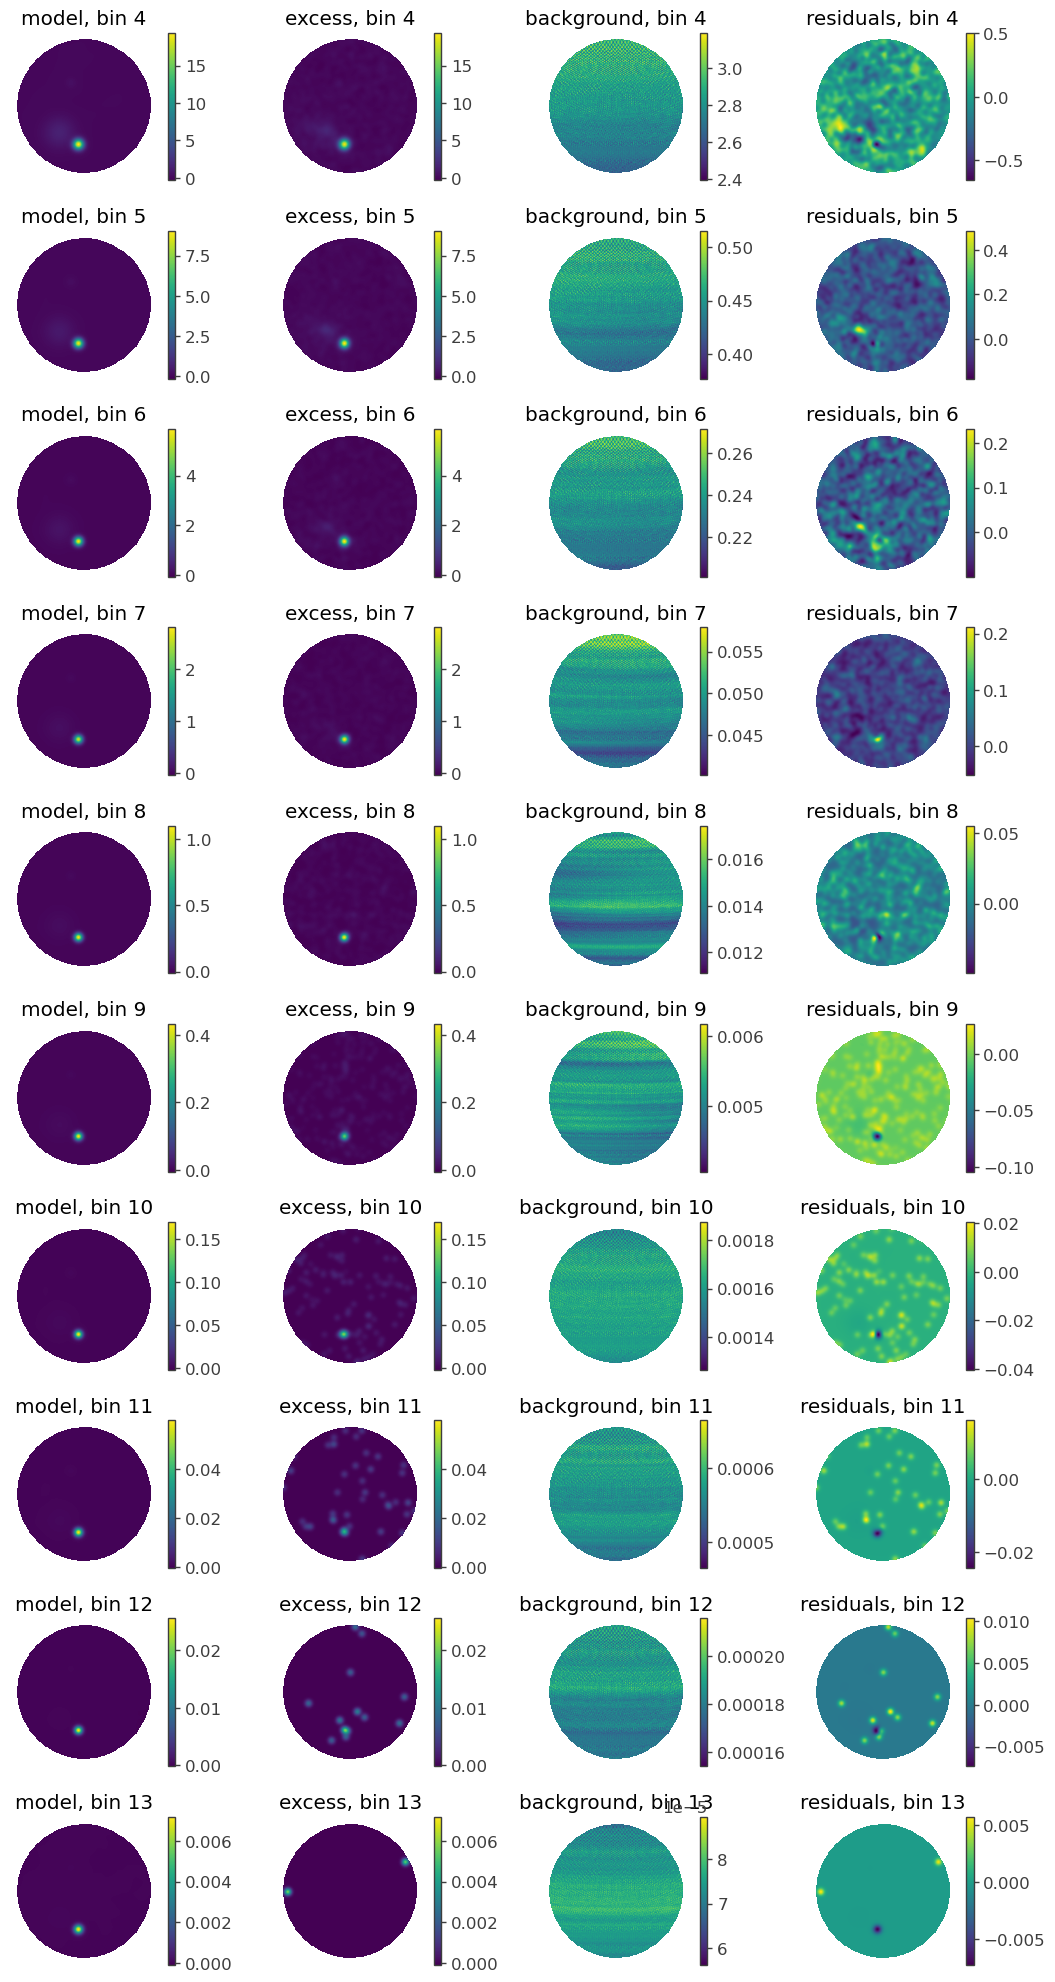

In [32]:
%matplotlib inline
result = my.fit(region_name, Modelname, KM2A, lm, 4, 13,mini="ROOT")
sources = my.get_sources(lm,result)
result[1][0]
# result[0].get_contours(J0248.Gaussian_on_sphere.lon0,39.88,44.88,30)

In [33]:
TSlist = ["PWN", "Diffuse"] #"S147",
TS, TSresults = my.getTSall(TSlist, region_name, Modelname, result, KM2A)
TSresults

19:41:01 INFO      TS_all: 33348.706081045944                                                         ]8;id=906352;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=135275;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1047\1047]8;;\

         INFO      llh_all: -13269.429366390761                                                       ]8;id=137640;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=259340;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1049\1049]8;;\

19:41:01 INFO      Considering 9 dec bins for extended source J0542P2311u          ]8;id=327386;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=654612;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#133\133]8;;\

         INFO      Central bin is bin at Declination = 23.201                      ]8;id=451505;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=786902;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#142\142]8;;\

         INFO      Considering 19 dec bins for extended source Diffuse             ]8;id=803021;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=12704;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#133\133]8;;\

         INFO      Central bin is bin at Declination = 25.803                      ]8;id=672976;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=496991;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#142\142]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=10406;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=961917;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1071\1071]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=809372;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=723394;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1071\1071]8;;\

19:41:32 INFO      Considering 9 dec bins for extended source J0542P2311u          ]8;id=489374;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=495126;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#133\133]8;;\

         INFO      Central bin is bin at Declination = 23.201                      ]8;id=212097;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=872261;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#142\142]8;;\

         INFO      Considering 19 dec bins for extended source Diffuse             ]8;id=641432;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=147952;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#133\133]8;;\

         INFO      Central bin is bin at Declination = 25.803                      ]8;id=19386;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=964458;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#142\142]8;;\

19:41:32 INFO      TS_PWN: 34.62351176394077                                                          ]8;id=76982;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=220250;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1052\1052]8;;\

         INFO      Considering 9 dec bins for extended source J0542P2311u          ]8;id=792873;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=624805;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#133\133]8;;\

         INFO      Central bin is bin at Declination = 23.201                      ]8;id=506406;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=551403;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#142\142]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=183051;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=621173;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1071\1071]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=58917;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=517789;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1071\1071]8;;\

19:42:07 INFO      Considering 9 dec bins for extended source J0542P2311u          ]8;id=514192;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=466012;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#133\133]8;;\

         INFO      Central bin is bin at Declination = 23.201                      ]8;id=71189;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=465512;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#142\142]8;;\

         INFO      Considering 19 dec bins for extended source Diffuse             ]8;id=322838;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=812933;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#133\133]8;;\

         INFO      Central bin is bin at Declination = 25.803                      ]8;id=382088;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=647804;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#142\142]8;;\

19:42:07 INFO      TS_Diffuse: 45.23517791115228                                                      ]8;id=77808;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=429185;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1052\1052]8;;\


100%|██████████| 2/2 [01:06<00:00, 33.03s/it]


PWN    Diffuse        TS_all  -log(likelihood)
0  34.623512  45.235178  33348.706081      13269.429366

LHAASO:  1 83.62 22.01 1LHAASO J0534+2200u  0.0
LHAASO:  2 83.61 22.04 1LHAASO J0534+2200u   0.0
LHAASO:  3 85.71 23.2  1LHAASO J0542+2311u  0.98
LHAASO:  4 86.07 23.19  1LHAASO J0542+2311u   1.45
TeVCat:  1 80.43749999999999 21.214277777777777 VER J0521+211 0.0
TeVCat:  2 83.62874999999998 22.01236111111111 Crab 0.0145
TeVCat:  3 83.63291666666665 22.0145 Crab Pulsar 0.0
TeVCat:  4 85.77999999999999 23.4 HAWC J0543+233 0.5
PSR:  1 79.29166666666666 22.266666666666666 J0517+22
PSR:  2 82.21774999999998 22.00111111111111 J0528+2200
PSR:  3 83.63320833333333 22.01447222222222 J0534+2200
PSR:  4 84.60441666666665 28.28588888888889 J0538+2817
PSR:  5 85.15466666666666 32.127027777777776 J0540+3207
PSR:  6 85.79025 23.484722222222224 J0543+2329
PSR:  7 86.61983333333332 24.689166666666665 J0546+2441
PSR:  8 88.52087499999999 31.128055555555555 J0554+3107
SNR:  1 81.27083333333333 28.183333333333334 G178.2-04.2 0
SNR:  2 83.62916666666665 22.016666666666666 G184.6-05.8 0
SNR:  3 84.75 27.833

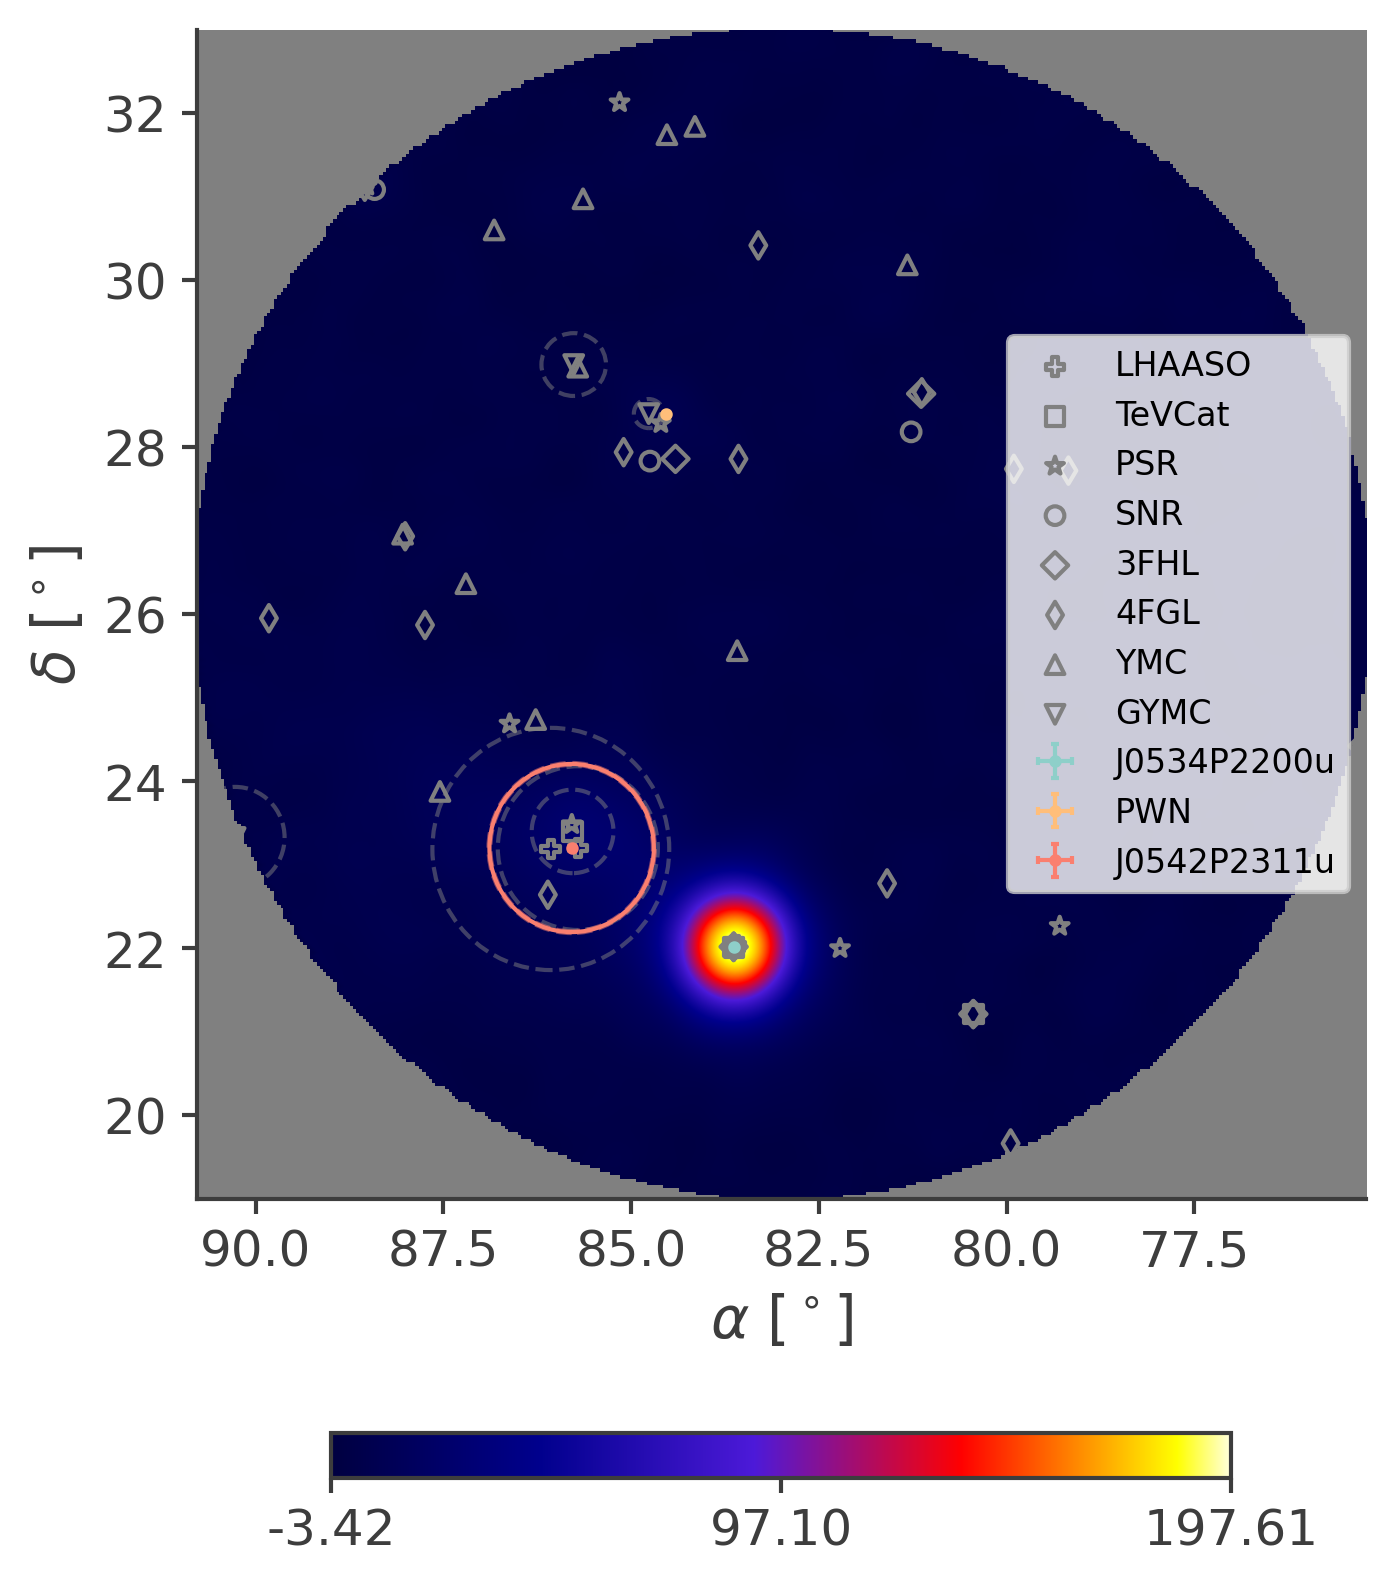

In [34]:
%matplotlib inline
sources = my.get_sources(lm,result)
sources.pop("Diffuse")

# sources={}
map2, skymapHeader = hp.read_map("../../data/fullsky_KM2A_20240131_3.5.fits.gz",h=True)
map2 = my.maskroi(map2, roi)
fig = my.drawmap(region_name, Modelname, sources, map2, ra1, dec1, rad=2*data_radius, contours=[10000],save=1, 
                # cat={ }, #
                cat={ "LHAASO": [0, "P"],"TeVCat": [0, "s"],"PSR": [0, "*"],"SNR": [0, "o"],"3FHL": [0, "D"],"4FGL": [0, "d"],"YMC": [0, "^"],"GYMC": [0, "v"],"WR": [0, "X"],"size": 20,"markercolor": "grey","labelcolor": "black","angle": 60,"catext": 1 },
                # color="Milagro"
                  color="Fermi"
                  # Drawdiff=1,legend=0
                  )

In [ ]:
my.write_resmap(region_name, Modelname, KM2A, roi, maptree, ra1, dec1, "J0057_res_all",[],[0,0])

Best fit values:

result             unit
parameter                                                                 
Diffuse.spectrum.main.PowerlawM.K  (2.0 +/- 0.7) x 10^-25  1 / (cm2 keV s)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1       2936.016965
total        2936.016965

Values of statistical measures:

statistical measures
AIC           5874.033935
BIC           5885.428546

4 0 8.341871710086707 4


Best fit values:

result             unit
parameter                                                                 
Diffuse.spectrum.main.PowerlawM.K  (3.6 +/- 0.7) x 10^-25  1 / (cm2 keV s)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1        2848.02478
total         2848.02478

Values of statistical measures:

statistical measures
AIC           5698.049566
BIC           5709.444177

5 0 26.341926848210278 4


Best fit values:

result             unit
parameter                                                                 
Diffuse.spectrum.main.PowerlawM.K  (3.2 +/- 0.9) x 10^-25  1 / (cm2 keV s)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1       2609.992748
total        2609.992748

Values of statistical measures:

statistical measures
AIC           5221.985503
BIC           5233.380114

6 0 13.209208627202315 4


Best fit values:

result             unit
parameter                                                                 
Diffuse.spectrum.main.PowerlawM.K  (2.5 +/- 1.0) x 10^-25  1 / (cm2 keV s)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1       2195.563824
total        2195.563824

Values of statistical measures:

statistical measures
AIC           4393.127655
BIC           4404.522266

7 0 6.078541257506004 4


Best fit values:

result             unit
parameter                                                                 
Diffuse.spectrum.main.PowerlawM.K  (2.9 +/- 1.4) x 10^-25  1 / (cm2 keV s)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1       1372.720686
total        1372.720686

Values of statistical measures:

statistical measures
AIC           2747.441378
BIC           2758.835989

8 0 4.617619510367149 4


Best fit values:

result             unit
parameter                                                                  
Diffuse.spectrum.main.PowerlawM.K  (-1.3 +/- 2.0) x 10^-25  1 / (cm2 keV s)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1        645.293307
total         645.293307

Values of statistical measures:

statistical measures
AIC           1292.586619
BIC           1303.981230

9 0 0 4
get upper limit


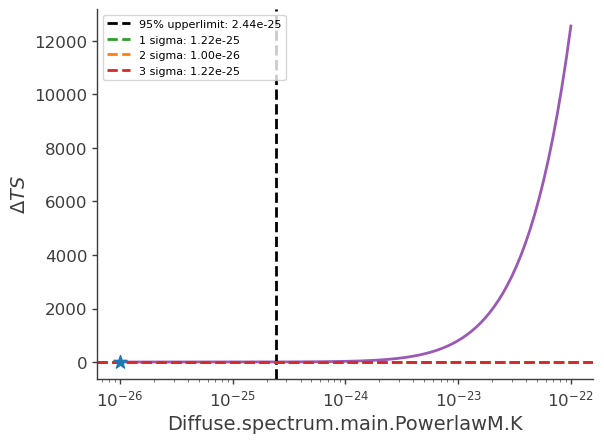

Best fit values:

result             unit
parameter                                                                 
Diffuse.spectrum.main.PowerlawM.K  (5.0 +/- 3.4) x 10^-25  1 / (cm2 keV s)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1        375.325028
total         375.325028

Values of statistical measures:

statistical measures
AIC            752.650063
BIC            764.044674

10 0 2.6352446966188836 4
get upper limit


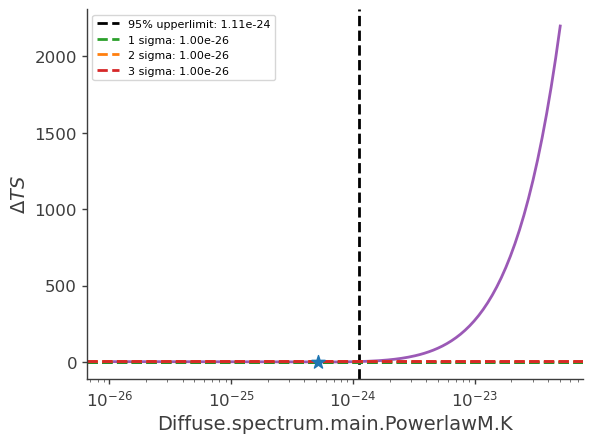

Best fit values:

result             unit
parameter                                                             
Diffuse.spectrum.main.PowerlawM.K  (7 +/- 6) x 10^-25  1 / (cm2 keV s)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1        194.178791
total         194.178791

Values of statistical measures:

statistical measures
AIC            390.357588
BIC            401.752199

11 0 1.8919601773651493 4
get upper limit


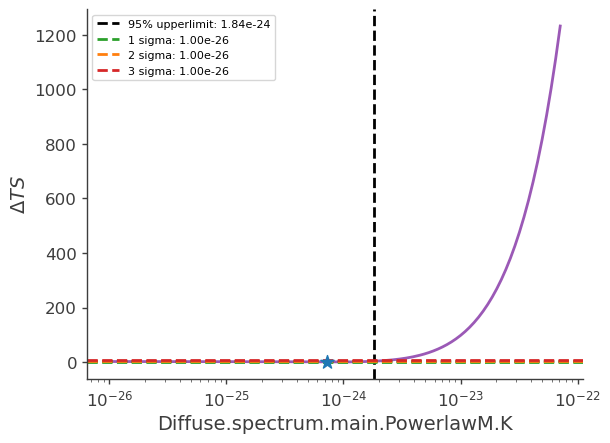

Best fit values:

result             unit
parameter                                                             
Diffuse.spectrum.main.PowerlawM.K  (3 +/- 8) x 10^-25  1 / (cm2 keV s)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1         73.152334
total          73.152334

Values of statistical measures:

statistical measures
AIC            148.304674
BIC            159.699285

12 0 0.1089775577055434 4
get upper limit


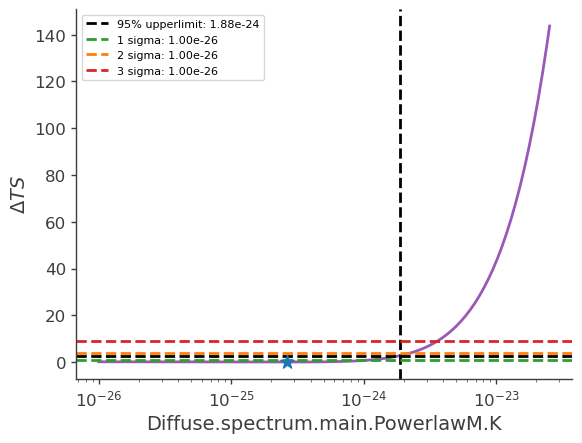

Best fit values:

result             unit
parameter                                                                  
Diffuse.spectrum.main.PowerlawM.K  (-0.8 +/- 1.7) x 10^-24  1 / (cm2 keV s)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1         14.671049
total          14.671049

Values of statistical measures:

statistical measures
AIC             31.342104
BIC             42.736715

13 0 0 4
get upper limit


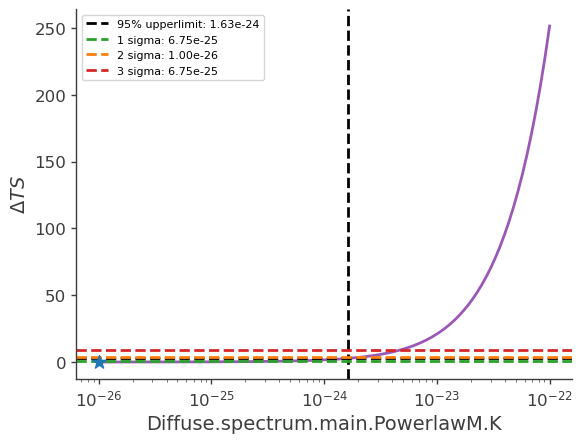

100%|██████████| 10/10 [01:09<00:00,  6.98s/it]


Best fit values:

result             unit
parameter                                                             
PWN.spectrum.main.PowerlawM.K  (7.9 +/- 3.0) x 10^-27  1 / (cm2 keV s)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1        2936.46764
total         2936.46764

Values of statistical measures:

statistical measures
AIC           5874.935285
BIC           5886.329896

4 0 7.658412714663427 4


Best fit values:

result             unit
parameter                                                             
PWN.spectrum.main.PowerlawM.K  (1.1 +/- 0.4) x 10^-26  1 / (cm2 keV s)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1       2848.778487
total        2848.778487

Values of statistical measures:

statistical measures
AIC           5699.556981
BIC           5710.951592

5 0 12.390884362888755 4


Best fit values:

result             unit
parameter                                                             
PWN.spectrum.main.PowerlawM.K  (1.6 +/- 0.5) x 10^-26  1 / (cm2 keV s)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1       2609.153632
total        2609.153632

Values of statistical measures:

statistical measures
AIC           5220.307271
BIC           5231.701882

6 0 15.516693672936526 4


Best fit values:

result             unit
parameter                                                         
PWN.spectrum.main.PowerlawM.K  (4 +/- 5) x 10^-27  1 / (cm2 keV s)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1        2195.01004
total         2195.01004

Values of statistical measures:

statistical measures
AIC           4392.020085
BIC           4403.414696

7 0 0.6002205999902799 4
get upper limit


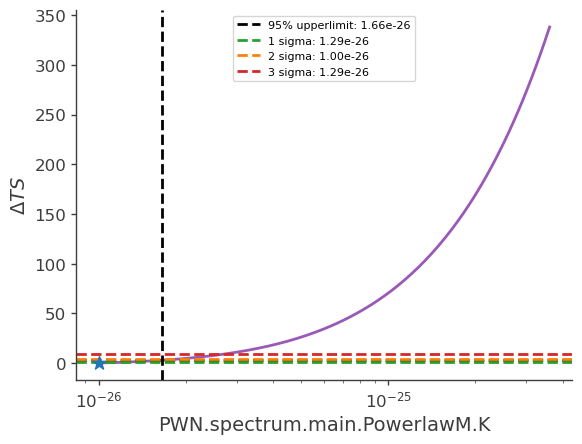

Best fit values:

result             unit
parameter                                                             
PWN.spectrum.main.PowerlawM.K  (1.1 +/- 1.0) x 10^-26  1 / (cm2 keV s)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1       1372.712285
total        1372.712285

Values of statistical measures:

statistical measures
AIC           2747.424576
BIC           2758.819187

8 0 2.931870908383644 4
get upper limit


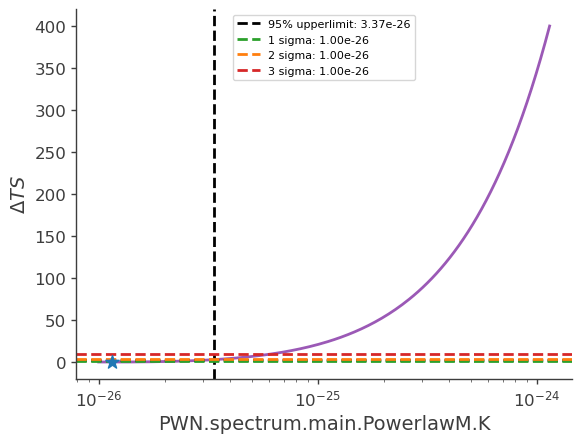

Best fit values:

result             unit
parameter                                                             
PWN.spectrum.main.PowerlawM.K  (0.0 +/- 1.8) x 10^-25  1 / (cm2 keV s)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1        646.607396
total         646.607396

Values of statistical measures:

statistical measures
AIC           1295.214799
BIC           1306.609410

9 0 -0.02732824007534873 4
get upper limit


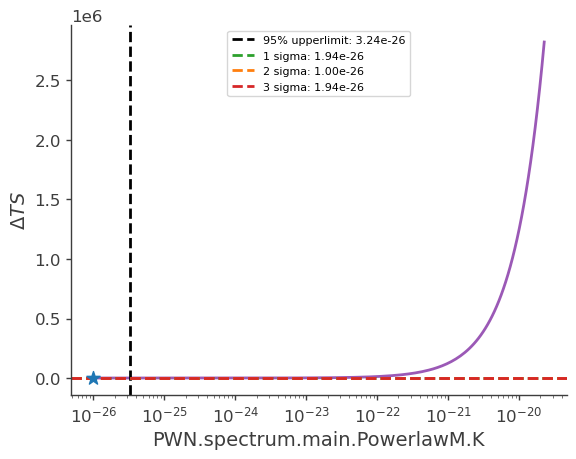

Best fit values:

result             unit
parameter                                                         
PWN.spectrum.main.PowerlawM.K  (3 +/- 6) x 10^-26  1 / (cm2 keV s)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1         375.51768
total          375.51768

Values of statistical measures:

statistical measures
AIC            753.035365
BIC            764.429976

10 0 0.4348197961662663 4
get upper limit


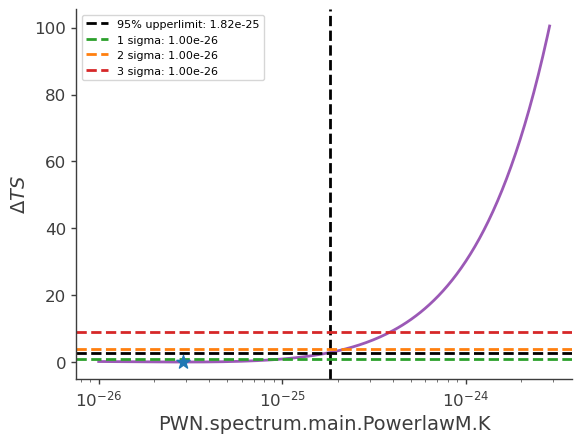

Best fit values:

result             unit
parameter                                                         
PWN.spectrum.main.PowerlawM.K  (0 +/- 5) x 10^-25  1 / (cm2 keV s)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1           194.463
total            194.463

Values of statistical measures:

statistical measures
AIC            390.926006
BIC            402.320617

11 0 -0.0017404889343879404 4
get upper limit


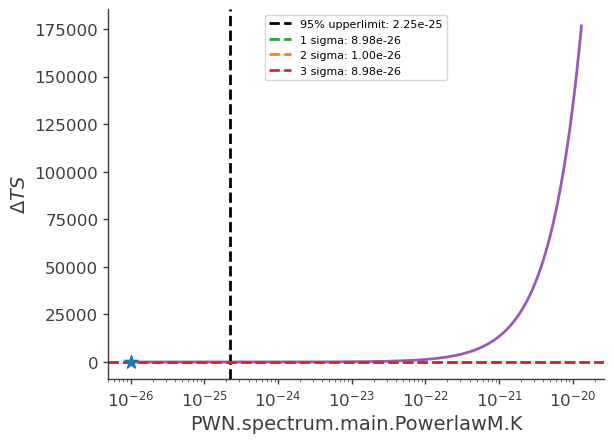

Best fit values:

result             unit
parameter                                                          
PWN.spectrum.main.PowerlawM.K  (0 +/- 10) x 10^-25  1 / (cm2 keV s)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1         73.131596
total          73.131596

Values of statistical measures:

statistical measures
AIC            148.263198
BIC            159.657809

12 0 -0.0004372696366203854 4
get upper limit


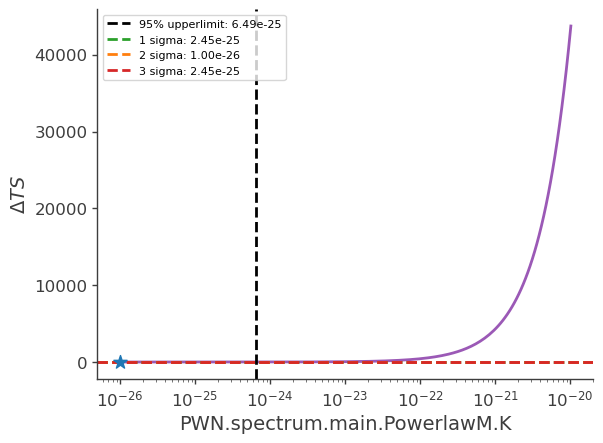

Best fit values:

result             unit
parameter                                                             
PWN.spectrum.main.PowerlawM.K  (0.0 +/- 1.8) x 10^-24  1 / (cm2 keV s)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1         15.358107
total          15.358107

Values of statistical measures:

statistical measures
AIC             32.716221
BIC             44.110832

13 0 -0.00012795582299673924 4
get upper limit


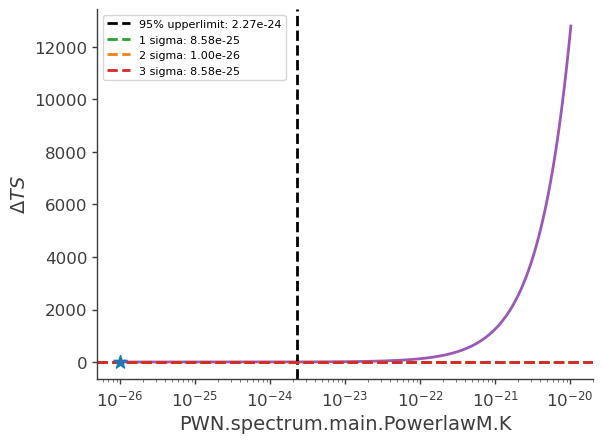

100%|██████████| 10/10 [01:07<00:00,  6.71s/it]


In [35]:
# Flux_KM2A0, jls0  = my.getdatapoint(KM2A, lm, maptree, response, roi, "S147", ifpowerlawM=1, piv=50)
Flux_KM2A1, jls1  = my.getdatapoint(KM2A, lm, maptree, response, roi, "Diffuse", ifpowerlawM=1, piv=50, scanbin=0)
Flux_KM2A2, jls2  = my.getdatapoint(KM2A, lm, maptree, response, roi, "PWN", ifpowerlawM=1, piv=50, scanbin=0)

processing MLE analyses:   0%|          | 0/2 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]

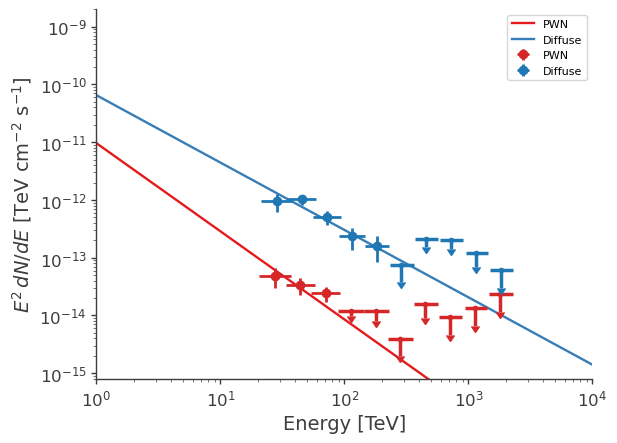

In [36]:
%matplotlib inline
import matplotlib as mpl

x_Max=10000.
x_Min=1
y_Min=0.8e-15
y_Max=2e-9
fig,ax = plt.subplots()
plot_spectra(
    result[0].results,
    sources_to_use=["PWN","Diffuse"], #,"Diffuse","ext1","ext2","ext4","ext5","ext6","ext7"| "S176",
    include_extended=True,
    ene_min=x_Min,
    ene_max=x_Max,
    num_ene=30,
    energy_unit="TeV",
    flux_unit="TeV/(s cm2)",
    subplot=ax,
    )

# my.Draw_sepctrum_points(region_name, Modelname, Flux_KM2A0,"S147","tab:red", usexerr=True)
my.Draw_sepctrum_points(region_name, Modelname, Flux_KM2A2,"PWN","tab:red", usexerr=True)
my.Draw_sepctrum_points(region_name, Modelname, Flux_KM2A1,"Diffuse","tab:blue", usexerr=True)
# my.Draw_spectrum_fromfile("/data/home/cwy/Science/3MLWCDA/Standard/res/S147/1pt+HI_freeDGE_0-5_roi6/Spectrum_PWN.txt",label="PWN WCDA",color="tab:purple", threshold=1)

# LHAASO_sensitivity = np.genfromtxt("./LHAASO_sensitivity.csv",delimiter=',')
# plt.plot(LHAASO_sensitivity[:,0],LHAASO_sensitivity[:,1]*1e-11,label="LHAASO 1yr", c="black")

ax.set_xlim(x_Min,x_Max)
ax.set_ylim(y_Min,y_Max)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r"$E^2\,dN/dE$ [TeV cm$^{-2}$ s$^{-1}$]")
ax.set_xlabel("Energy [TeV]")
plt.legend()
plt.savefig(f'../res/{region_name}/{Modelname}/Spectrum.png', dpi=300)
plt.savefig(f'../res/{region_name}/{Modelname}/Spectrum.pdf')

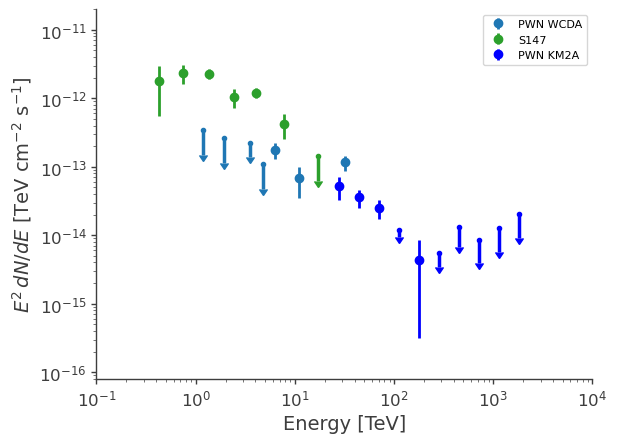

In [37]:
%matplotlib inline
import matplotlib as mpl

x_Max=10000.
x_Min=0.1
y_Min=0.8e-16
y_Max=2e-11
fig,ax = plt.subplots()

# my.Draw_sepctrum_points(region_name, Modelname, Flux_KM2A0,"S147","tab:red", usexerr=True)
# my.Draw_sepctrum_points(region_name, Modelname, Flux_KM2A2,"PWN","tab:red", usexerr=True)
# my.Draw_sepctrum_points(region_name, Modelname, Flux_KM2A1,"Diffuse","tab:blue", usexerr=True)
# my.Draw_spectrum_fromfile("/data/home/cwy/Science/3MLWCDA/Standard/res/S147/1pt+HI_freeDGE_0-5_roi6/Spectrum_PWN.txt",label="PWN WCDA",color="tab:purple", threshold=1)

my.Draw_spectrum_fromfile("/data/home/cwy/Science/3MLWCDA/Standard/res/S147/cat+1ext+1pt_freeDGE_0-6/Spectrum_PWN.txt",label="PWN WCDA",color="tab:blue", threshold=1)
my.Draw_spectrum_fromfile("/data/home/cwy/Science/3MLWCDA/Standard/res/S147/cat+1ext+1pt_freeDGE_0-6/Spectrum_S147.txt",label="S147",color="tab:green", threshold=1)
my.Draw_spectrum_fromfile("/data/home/cwy/Science/3MLWCDA/Standard/res/S147/cat+1pt_freeDGE_4-13_roi6_KM2A/Spectrum_PWN.txt",label="PWN KM2A", color="blue", threshold=1)

# my.Draw_spectrum_fromfile("/data/home/cwy/Science/3MLWCDA/Standard/res/S147/cat+1ext+1pt_freeDGE_0-6/Spectrum_PWN.txt",label="PWN WCDA",color="tab:purple", threshold=1)


# LHAASO_sensitivity = np.genfromtxt("./LHAASO_sensitivity.csv",delimiter=',')
# plt.plot(LHAASO_sensitivity[:,0],LHAASO_sensitivity[:,1]*1e-11,label="LHAASO 1yr", c="black")

ax.set_xlim(x_Min,x_Max)
ax.set_ylim(y_Min,y_Max)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r"$E^2\,dN/dE$ [TeV cm$^{-2}$ s$^{-1}$]")
ax.set_xlabel("Energy [TeV]")
plt.legend()
plt.savefig(f'../res/{region_name}/{Modelname}/Spectrum.png', dpi=300)
plt.savefig(f'../res/{region_name}/{Modelname}/Spectrum.pdf')